In [ ]:
import Transform.Schedule


In [ ]:
import model.backbone.torchvision
import model.backbone.smp

import model.heads

class Model(BaseModel):
    

In [ ]:
model = Model()
loss_fn
optimizer
scheduler

major_metrics = []
minor_mertics = []



In [1]:
from Configuration import Editor

with Editor('Config') as Config:
    Config.Random.Seed = 4
    Config.Random.cuDNN.Deterministic = True
    Config.Random.cuDNN.Benchmark = True
    #prepare dataset before training
    
    Config.Dataset.ImagesRootPath = r'D:\Dataset_Collection\Cardiac_Catheterization\train\images'
    Config.Dataset.MasksRootPath = r'D:\Dataset_Collection\Cardiac_Catheterization\train\masks'
    
    Config.Dataset.IO.InputRGBImage = False
    Config.Dataset.IO.NumWorkers = 0
    Config.Dataset.IO.PinMemory = False
    Config.Dataset.IO.PrefetchFactor = 2
    Config.Dataset.IO.OutputDtype = 'float'
    
    Config.Dataset.Preprocess.Version = 'v1'
    #train dataset
    Config.Dataset.Train.BatchSize = None
    Config.Dataset.Train.Transform.Combination.Version = 'v1'
    Config.Dataset.Train.Transform.Schedule = 0.8
    Config.Dataset.Train.Transform.Combination.Components = 'default'
    Config.Dataset.Train.Transform.Combination.Params = 'default'
    Config.Dataset.Train.Transform.Combination.Schedules = 'default'
    #validation dataset
    Config.Dataset.Validation.BatchSize = None
    Config.Dataset.Validation.Ratio = 3
    Config.Dataset.Validation.Transform.Combination.Version = 'v1'
    Config.Dataset.Validation.Transform.Schedule = 0.8
    Config.Dataset.Validation.Transform.Combination.Components = 'default'
    Config.Dataset.Validation.Transform.Combination.Params = 'default'
    Config.Dataset.Validation.Transform.Combination.Schedules = 'default'
    
    
    Config.Model.Class = object
    Config.Model.Params = {}
    
    Config.Model.Load.Path = None
    Config.Model.Load.FileName = ''
    
    Config.Model.Backbone.Trainable = True
    
    Config.Training.Loss.Class = object
    Config.Training.Loss.Param = {}
    Config.Training.Optimizer.Class = object
    Config.Training.Optimizer.HyperParam = {}
    Config.Training.Scheduler.Class = object
    Config.Training.Scheduler.HyperParam = {}
    
    Config.Training.Resume.Load.Path = None
    Config.Training.Resume.Load.Filename = str
    Config.Training.Resume.Loss = False
    Config.Training.Resume.Optimizer = False
    Config.Training.Resume.Schedule = False
    
    Config.Training.Attempts = 2
    Config.Training.Epochs = 3
    Config.Training.GradientAccumulation = 1
    
    Config.Metrics.Major
    Config.Metrics.Minor
    
    Config.Callback.SavePath = ''
    Config.Callback.ImagesPerSave = 128
    
    Config.Logging.ImagesPerLog = 32
    Config.Logging.ProjectName = 'model_1 demo'
    Config.Logging.ModelName = 'model_1'
    Config.Logging.Comment = 'change Optimizer, Loss function'
    Config.Logging.TrialCount = 2
    
    Config.Logging.Purpose = ''
    Config.Logging.Note = ''

In [2]:
import matplotlib.pyplot as plt

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.optim import lr_scheduler
from torch.cuda.amp import autocast, GradScaler
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import models

import segmentation_models_pytorch as smp

===============attempt 0==================
tensor([[[[ 0.0230,  0.0227, -0.1572],
          [-0.1116, -0.1897, -0.1775],
          [ 0.1897,  0.1590,  0.0456]],

         [[ 0.1826, -0.0697, -0.1098],
          [ 0.1641, -0.0102,  0.0365],
          [ 0.1138,  0.1014, -0.1102]],

         [[-0.0744, -0.1776,  0.0085],
          [-0.0690,  0.0413,  0.0090],
          [ 0.1641,  0.0166,  0.0964]]],


        [[[ 0.0607,  0.1707, -0.0800],
          [ 0.1607,  0.1380, -0.0768],
          [ 0.1180,  0.1779, -0.1088]],

         [[-0.0751,  0.1317,  0.1552],
          [ 0.0508,  0.0591,  0.1425],
          [ 0.1687, -0.1217, -0.0792]],

         [[ 0.1620,  0.1039, -0.0903],
          [-0.0653,  0.1868, -0.1205],
          [ 0.1238,  0.1117, -0.1846]]],


        [[[-0.1921,  0.0639,  0.0944],
          [ 0.1706,  0.0237,  0.1306],
          [-0.1368,  0.1149, -0.1854]],

         [[ 0.1254,  0.0209,  0.1189],
          [ 0.0760, -0.1331,  0.0020],
          [ 0.0243,  0.0277, -0.1685]],

 

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_47.png


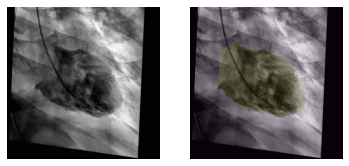

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_52.png


D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_49.png


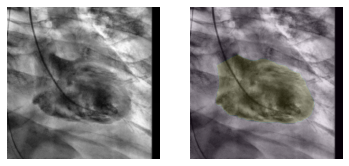

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_53.png


D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_56.png


D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_48.png


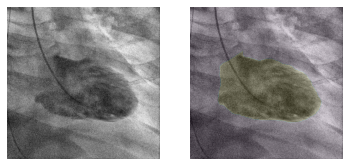

=====Validation=====
D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_50.png


D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_55.png


D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_51.png


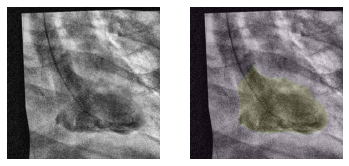

==========epoch 1=============
=====Train=====
D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_52.png


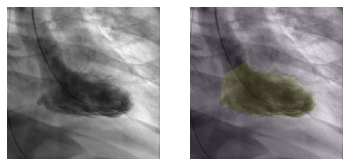

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_49.png


D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_47.png


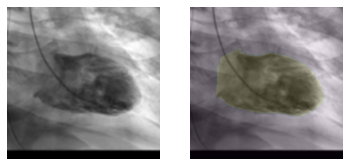

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_56.png


D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_53.png


D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_48.png


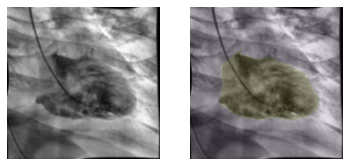

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_54.png


=====Validation=====
D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_50.png


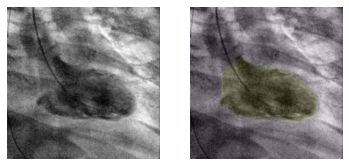

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_55.png


D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_51.png


==========epoch 2=============
=====Train=====
D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_53.png


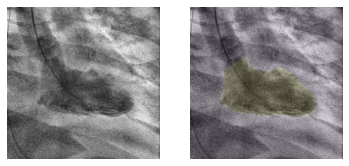

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_48.png


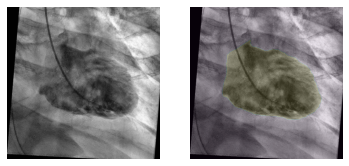

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_56.png


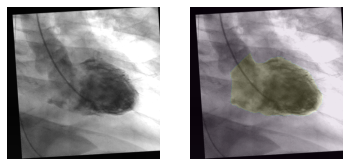

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_52.png


D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_47.png


D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_49.png


D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_54.png


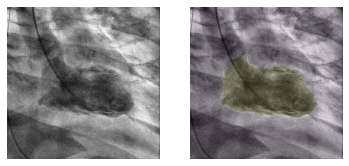

=====Validation=====
D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_50.png


D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_55.png


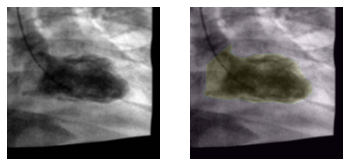

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_51.png


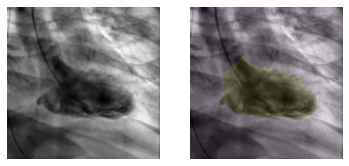

===============attempt 1==================
tensor([[[[ 0.1339, -0.0275, -0.1150],
          [ 0.1277,  0.1861,  0.0170],
          [ 0.0927, -0.1106,  0.0615]],

         [[-0.0551,  0.0771, -0.0645],
          [ 0.1908,  0.1666,  0.0373],
          [-0.1765,  0.0538,  0.1455]],

         [[ 0.1426,  0.0877,  0.0971],
          [ 0.1045, -0.0028,  0.0154],
          [ 0.1862, -0.0254, -0.0221]]],


        [[[-0.0558,  0.0918,  0.1917],
          [-0.1859,  0.1339, -0.1223],
          [-0.1168, -0.1231,  0.1855]],

         [[ 0.0120,  0.0808,  0.1852],
          [-0.0479,  0.0281, -0.0976],
          [-0.1091,  0.1348, -0.0841]],

         [[-0.1895, -0.0173, -0.1258],
          [ 0.1662, -0.1646,  0.0489],
          [-0.0102,  0.0669,  0.0985]]],


        [[[-0.1873, -0.1155, -0.0985],
          [-0.1863, -0.1106,  0.0287],
          [ 0.1410, -0.0044,  0.1790]],

         [[ 0.0030, -0.0472, -0.0609],
          [ 0.1003,  0.1689,  0.1289],
          [-0.0700, -0.0723, -0.1532]],

 

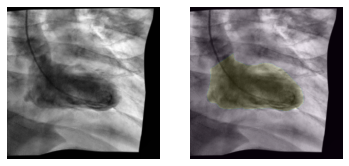

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_49.png


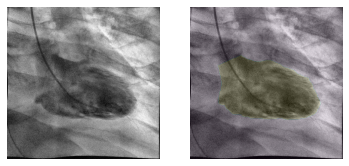

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_47.png


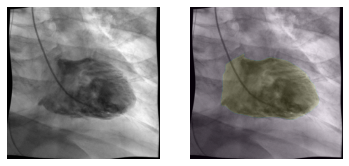

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_51.png


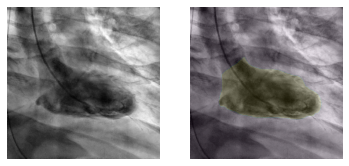

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_55.png


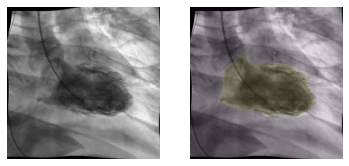

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_56.png


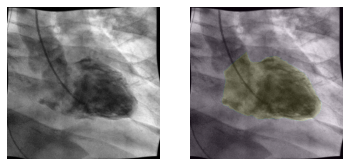

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_52.png


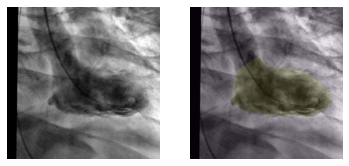

=====Validation=====
D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_50.png


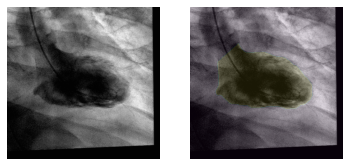

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_54.png


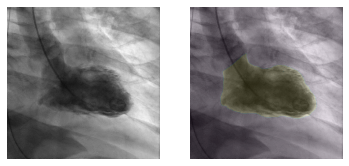

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_48.png


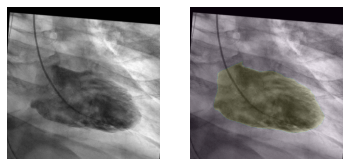

==========epoch 1=============
=====Train=====
D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_53.png


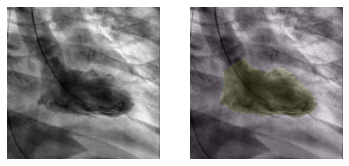

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_51.png


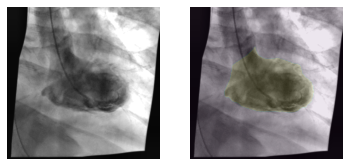

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_55.png


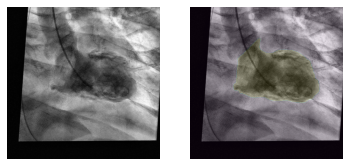

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_47.png


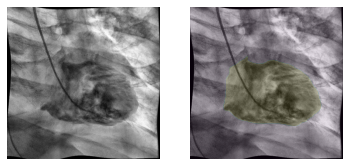

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_49.png


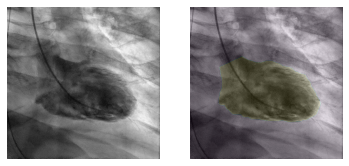

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_52.png


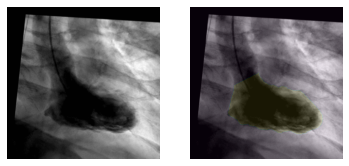

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_56.png


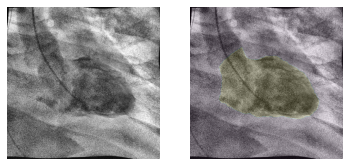

=====Validation=====
D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_50.png


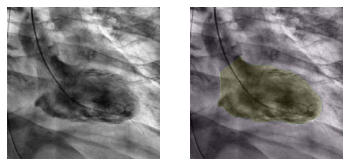

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_54.png


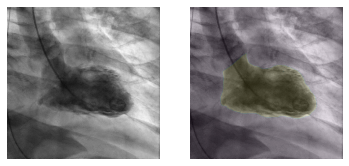

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_48.png


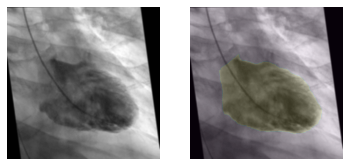

==========epoch 2=============
=====Train=====
D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_47.png


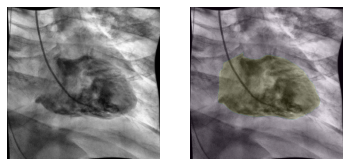

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_53.png


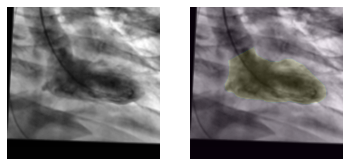

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_52.png


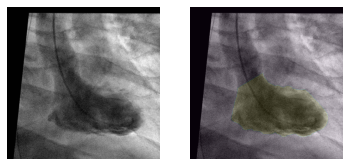

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_55.png


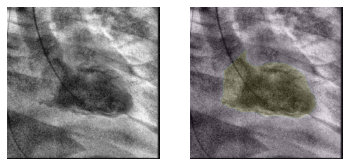

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_49.png


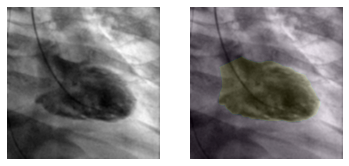

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_56.png


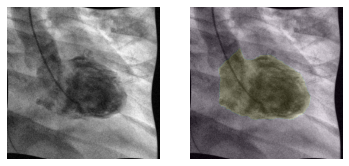

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_51.png


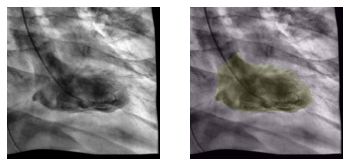

=====Validation=====
D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_50.png


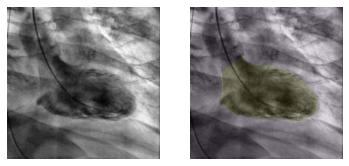

D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_54.png


D:/Dataset_Collection/Cardiac_Catheterization/train/images/0655 ant hypo/0655[0]_48.png


In [5]:
import numpy as np
import os
import random
import torch

from Dataset import TrainDataLoader
import Configuration

import Transform.Preprocess
import Transform.Combinations
import Transform.Schedule

Config = Configuration.Config

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

seed = Config.Random.Seed
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = Config.Random.cuDNN.Deterministic
torch.backends.cudnn.benchmark = Config.Random.cuDNN.Benchmark

train_transform_creater = getattr(Transform.Combinations, Config.Dataset.Train.Transform.Combination.Version)
train_transform_creater = train_transform_creater(
    Config.Dataset.Train.Transform.Schedule,
    Config.Dataset.Train.Transform.Combination.Components,
    Config.Dataset.Train.Transform.Combination.Params,
    Config.Dataset.Train.Transform.Combination.Schedules)

validation_transform_creater = getattr(Transform.Combinations, Config.Dataset.Validation.Transform.Combination.Version)
validation_transform_creater = validation_transform_creater(
    Config.Dataset.Validation.Transform.Schedule,
    Config.Dataset.Validation.Transform.Combination.Components,
    Config.Dataset.Validation.Transform.Combination.Params,
    Config.Dataset.Validation.Transform.Combination.Schedules)

preprocess = getattr(Transform.Preprocess,Config.Dataset.Preprocess.Version)

dataloader = TrainDataLoader(
    images_root = Config.Dataset.ImagesRootPath,
    masks_root = Config.Dataset.MasksRootPath,
    train_transform = train_transform_creater,
    train_batch_size = Config.Dataset.Train.BatchSize,
    validation_ratio = Config.Dataset.Validation.Ratio,
    validation_transform = validation_transform_creater,
    validation_batch_size = Config.Dataset.Validation.BatchSize,
    image_rgb = Config.Dataset.IO.InputRGBImage,
    preprocess = preprocess,
    num_workers = Config.Dataset.IO.NumWorkers,
    pin_memory = Config.Dataset.IO.PinMemory,
    prefetch_factor = Config.Dataset.IO.PrefetchFactor,
    dtype=Config.Dataset.IO.OutputDtype)

for attempt in range(Config.Training.Attempts):
    train_dataset, validation_dataset, validation_dataset_wo_arg = dataloader.get_dataset()
    print(f'===============attempt {attempt}==================')
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    train_data_count = len(train_dataset)
    gradient_accumulation = Config.Training.GradientAccumulation
    batch_size = Config.Dataset.Train.BatchSize
    step_size =  gradient_accumulation * batch_size
    steps_per_epoch = math.ceil(train_data_count/step_size)
    
    model = Config.Model.Class(**Config.Model.Params)
    
    if Config.Model.Load.Path != None:
        model_state_dict_path = pathlib.Path(Config.Model.Load.Path,Config.Model.Load.FileName)
        model_state_dict = torch.load(model_state_dict_path.as_posix())
        model.load_state_dict(model_state_dict)
    
    if not Config.Model.Backbone.Trainable:
        for param in model.backbone.parameters():
            param.requires_grad = False
    
    loss_func = Config.Training.Loss.Class(**Config.Training.Loss.Param)
    optimizer = Config.Training.Optimizer.Class(model.parameters(),**Config.Training.Optimizer.HyperParam)
    scheduler = Config.Training.Scheduler.Class(optimizer,**Config.Training.Scheduler.HyperParam)
    
    
#     if Config.Training.Resume.Load.Path is not None:
#         if 
    
    
    model = model.to(device)
#     loss_fn = loss_fn.to(device)
#     optimizer = optimizer.to(device)
#     scheduler = scheduler.to(device)
    
    model.train()
    for epoch in range(Config.Training.Epochs):
        print(f'==========epoch {epoch}=============')

        print('=====Train=====')
        acc_count = 0
        acc_loss = 0
        for batch_train_data in train_dataset(epoch):
            images,masks,image_paths = batch_train_data
            images = images.to(device)
            masks = masks.to(device)
#             images = images[0]
#             print(image_paths)
#             plt.figure()
#             plt.subplot(1,2,1)
#             plt.imshow(images,cmap = 'gray')
#             plt.axis('off')
#             plt.subplot(1,2,2)
#             plt.imshow(images,cmap = 'gray')
#             plt.imshow(masks,alpha=0.1)
#             plt.axis('off')
#             plt.show()

            predicts = model(images)
            loss = loss_func(predicts,masks)
            
            acc_loss += loss
            acc_count += 1
            
            if acc_count == gradient_accumulation:
                acc_loss = acc_loss / gradient_accumulation
                acc_loss.backward()
                optimizer.step()
                scheduler.step()
                optimizer.zero_gradient()
                acc_loss = 0
                acc_count = 0
                
        
        if acc_count != 0:
            acc_loss = acc_loss / acc_count
            acc_loss.backward()
            optimizer.step()
            scheduler.step()
            optimizer.zero_gradient()
            acc_loss = 0
            acc_count = 0
            
        print('=====Validation=====')
        for batch_validation_data in validation_dataset(epoch):
            image,mask,image_path = batch_validation_data
            image = image[0]
            print(image_path)
            plt.figure()
            plt.subplot(1,2,1)
            plt.imshow(image,cmap = 'gray')
            plt.axis('off')
            plt.subplot(1,2,2)
            plt.imshow(image,cmap = 'gray')
            plt.imshow(mask,alpha=0.1)
            plt.axis('off')
            plt.show()
        
#         print('=====Validation without transform=====')
#         for batch_validation_data in validation_dataset_wo_arg(epoch):
#             image,mask = batch_validation_data
#             image = image[0]
#             plt.figure()
#             plt.subplot(1,2,1)
#             plt.imshow(image,cmap = 'gray')
#             plt.axis('off')
#             plt.subplot(1,2,2)
#             plt.imshow(image,cmap = 'gray')
#             plt.imshow(mask,alpha=0.1)
#             plt.axis('off')
#             plt.show()

In [1]:
from torch import nn
from torch.nn import functional as F
from torch import optim
import torch

class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, 3,bias=False)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 5, 3,bias=False)
#         self.adapt = nn.AdaptiveMaxPool2d(1)
        self.fc1 = nn.Linear(5 * 3 * 3, 3,bias=False)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 5 * 3 * 3)
        x = self.fc1(x)
        return x

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
input_x = torch.ones((1,3,20,20))
y = torch.tensor([[2]],dtype=float)
# loss_func = torch.nn.CrossEntropyLoss(label_smoothing=0.001)

input_x = input_x.to(device)
y = y.to(device)
# loss_func = loss_func.to(device)

In [4]:
torch.manual_seed(10)
model = TheModelClass()

In [5]:
optimizer = torch.optim.Adam(model.parameters())

In [6]:
model = model.to(device)

In [20]:
acc_count = 5
acc_loss = 0

for i in range(2):
    x = model(input_x)
    loss = loss_fn(x,y)
    acc_loss = acc_loss + loss

acc_loss = acc_loss / acc_count
acc_loss.backward()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [9]:
optimizer.step()

In [16]:
class CrossEntropyLoss(nn.Module):
    def __init__(self, class_num, alpha=None, use_alpha=False, size_average=True):
        super(CrossEntropyLoss, self).__init__()
        self.class_num = class_num
        self.alpha = alpha
        if use_alpha:
            self.alpha = torch.tensor([alpha])
#             self.alpha = torch.tensor(alpha).cuda()

        self.softmax = nn.Softmax(dim=1)
        self.use_alpha = use_alpha
        self.size_average = size_average

    def forward(self, pred, target):
        prob = self.softmax(pred.view(-1,self.class_num))
        prob = prob.clamp(min=0.0001,max=1.0)

#         target_ = torch.zeros(target.size(0),self.class_num)
        target_ = torch.zeros(target.size(0),self.class_num).cuda()
        target_.scatter_(1, target.view(-1, 1).long(), 1.)

        if self.use_alpha:
            batch_loss = - self.alpha.double() * prob.log().double() * target_.double()
        else:
            batch_loss = - prob.log().double() * target_.double()

        batch_loss = batch_loss.sum(dim=1)

        # print(prob[0],target[0],target_[0],batch_loss[0])
        # print('--')

        if self.size_average:
            loss = batch_loss.mean()
        else:
            loss = batch_loss.sum()

        return loss

In [17]:
loss_fn = CrossEntropyLoss(3,0.01,True)

In [19]:
loss_fn = loss_fn.to(device)

In [22]:
loss_fn.alpha.is_cuda

False

In [23]:
loss_fn.alpha

tensor([0.0100])

In [15]:
a = torch.tensor([1,2,3,4])
b = torch.tensor([2])

a = a.to(device)

a*b

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!